In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as m
%matplotlib inline

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df=pd.read_csv('hour.csv')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [11]:
s=pd.Series([1,3,4,5,1,5])

In [9]:
np.array([1,3,4,5,1,5])

array([1, 3, 4, 5, 1, 5])

In [13]:
s.mean()

3.1666666666666665

In [16]:
type(s.values)

numpy.ndarray

In [19]:
s.index=['A','B','C','D','E','F']

In [21]:
s2=pd.Series([2,3,41,4,5,2],index=['A','B','C','D','E','F'])

In [31]:
#pd.DataFrame(np.arange(10).reshape(5,2))

In [43]:
d=pd.DataFrame(data={"Col 1":s,"Col2":s2})
d['Col 1']
d.Col2

A     2
B     3
C    41
D     4
E     5
F     2
Name: Col2, dtype: int64

In [35]:
def funct(x):
    return m.e**x+x**2+2
s.map(lambda x: funct(x))

A      5.718282
B     31.085537
C     72.598150
D    175.413159
E      5.718282
F    175.413159
dtype: float64

In [36]:
sq=lambda x: x**0.5

In [37]:
sq(10)

3.1622776601683795

# Exploratory Data Analysis

In [4]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [45]:
#select one col
#df["dteday"]
#df.dteday 

In [47]:
#df[['temp','cnt','hum']]

In [5]:
df["DateTime"]=df[['dteday','hr']].apply(lambda x:x['dteday']+" "+str(x["hr"])+":00",axis=1)

In [6]:
df["DateTime"].head()

0    2011-01-01 0:00
1    2011-01-01 1:00
2    2011-01-01 2:00
3    2011-01-01 3:00
4    2011-01-01 4:00
Name: DateTime, dtype: object

In [54]:
l=[1,3,5,9,10,12,15,23]
["01","03","05","09","10"]

1

In [ ]:
1="01"

In [68]:
df['hr'].head()

0    0
1    1
2    2
3    3
4    4
Name: hr, dtype: int64

In [6]:
def zero_pad_hour(s):
    if len(str(s))==2:
        return str(s)
    else:
        return "0"+str(s)


In [7]:
df["DateTime"]=df[['dteday','hr']].apply(lambda x:x['dteday']+\
                                         " "+zero_pad_hour(x["hr"])+":00",axis=1)

In [9]:
df["DateTime"].head()

0    2011-01-01 00:00
1    2011-01-01 01:00
2    2011-01-01 02:00
3    2011-01-01 03:00
4    2011-01-01 04:00
Name: DateTime, dtype: object

In [8]:
df["DateTime"]=pd.to_datetime(df.DateTime)
df['DateTime'].head()

0   2011-01-01 00:00:00
1   2011-01-01 01:00:00
2   2011-01-01 02:00:00
3   2011-01-01 03:00:00
4   2011-01-01 04:00:00
Name: DateTime, dtype: datetime64[ns]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 18 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
DateTime      17379 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(12), object(1)
memory usage: 2.4+ MB


In [9]:
count=df.cnt
count.head()

0    16
1    40
2    32
3    13
4     1
Name: cnt, dtype: int64

In [10]:
count.index=df.DateTime
count.index

DatetimeIndex(['2011-01-01 00:00:00', '2011-01-01 01:00:00',
               '2011-01-01 02:00:00', '2011-01-01 03:00:00',
               '2011-01-01 04:00:00', '2011-01-01 05:00:00',
               '2011-01-01 06:00:00', '2011-01-01 07:00:00',
               '2011-01-01 08:00:00', '2011-01-01 09:00:00',
               ...
               '2012-12-31 14:00:00', '2012-12-31 15:00:00',
               '2012-12-31 16:00:00', '2012-12-31 17:00:00',
               '2012-12-31 18:00:00', '2012-12-31 19:00:00',
               '2012-12-31 20:00:00', '2012-12-31 21:00:00',
               '2012-12-31 22:00:00', '2012-12-31 23:00:00'],
              dtype='datetime64[ns]', name='DateTime', length=17379, freq=None)

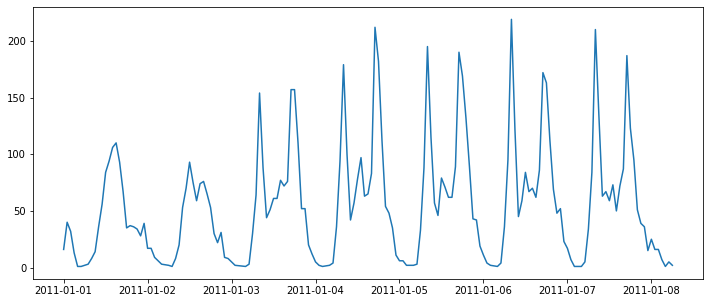

In [45]:
plt.figure(figsize=(12,5))
plt.plot(count[:24*7])

In [11]:
df.weathersit.value_counts()

1    11413
2     4544
3     1419
4        3
Name: weathersit, dtype: int64

In [12]:
df.groupby("weathersit")["cnt"].mean()

weathersit
1    204.869272
2    175.165493
3    111.579281
4     74.333333
Name: cnt, dtype: float64

In [48]:
df.groupby("weathersit")["casual"].mean()

weathersit
1    40.545431
2    29.595290
3    16.055673
4     2.666667
Name: casual, dtype: float64

In [13]:
df.groupby("weathersit")["registered"].mean()

weathersit
1    164.323841
2    145.570202
3     95.523608
4     71.666667
Name: registered, dtype: float64

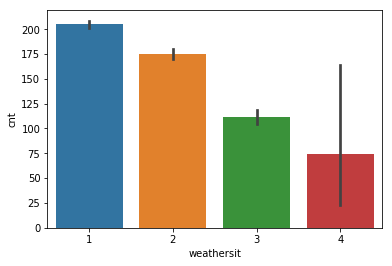

In [90]:
df.weathersit=df.weathersit.astype(str)
sns.barplot(x='weathersit',y='cnt',data=df)

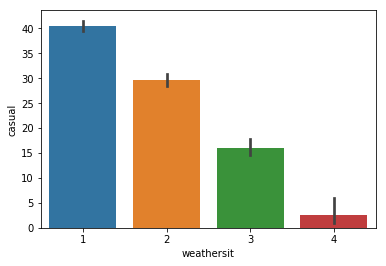

In [91]:
sns.barplot(x='weathersit',y='casual',data=df)

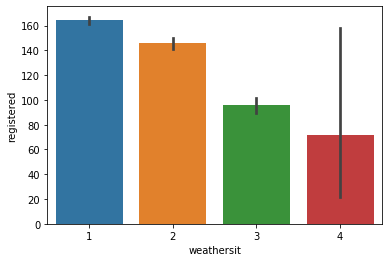

In [24]:
sns.barplot(x='weathersit',y='registered',data=df)

In [94]:
df.DateTime[0].month

1

In [71]:
df.DateTime[24].day

2

In [97]:
df.DateTime[0].weekday()

5

In [115]:
(df.DateTime[10]-df.DateTime[0]).seconds/(60*60)

10.0

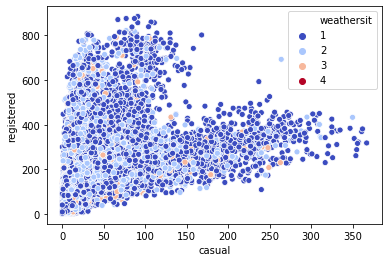

In [28]:
sns.scatterplot(df.casual,df.registered,hue=df.weathersit,palette='coolwarm')

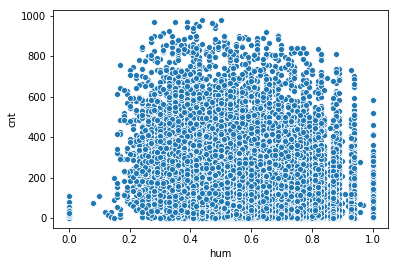

In [119]:
sns.scatterplot(df.hum,df.cnt)

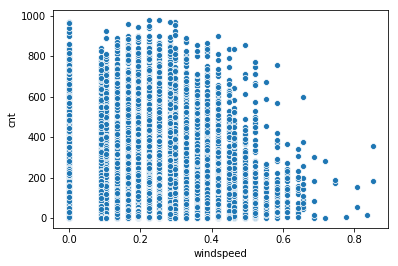

In [120]:
sns.scatterplot(df.windspeed,df.cnt)

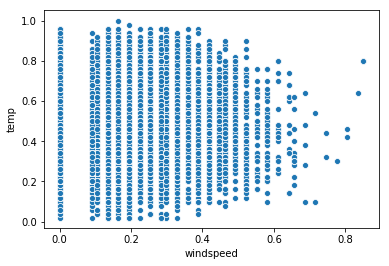

In [121]:
sns.scatterplot(df.windspeed,df.temp)

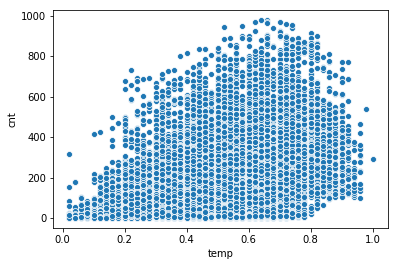

In [123]:
sns.scatterplot(df.temp,df.cnt)

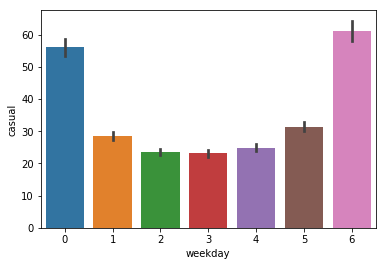

In [124]:
sns.barplot(df.weekday,df.casual)

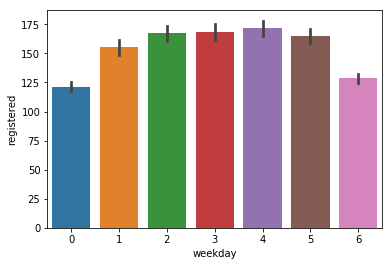

In [125]:
sns.barplot(df.weekday,df.registered)

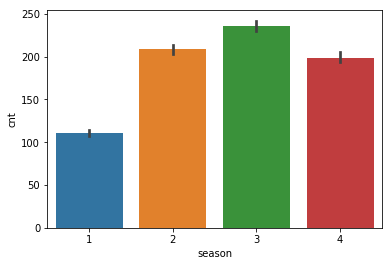

In [126]:
sns.barplot(df.season,df.cnt)

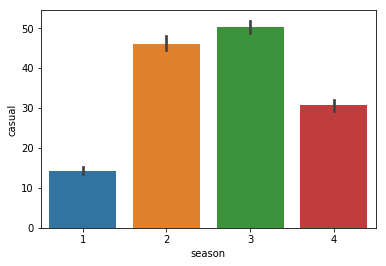

In [127]:
sns.barplot(df.season,df.casual)

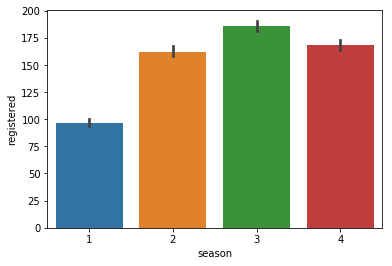

In [128]:
sns.barplot(df.season,df.registered)

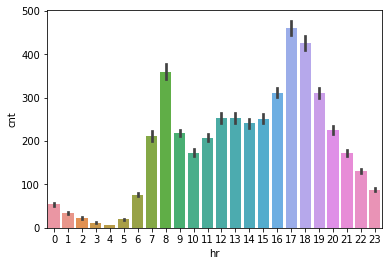

In [129]:
sns.barplot(df.hr,df.cnt)

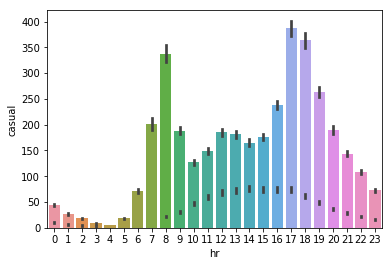

In [130]:
sns.barplot(df.hr,df.registered)
sns.barplot(df.hr,df.casual)

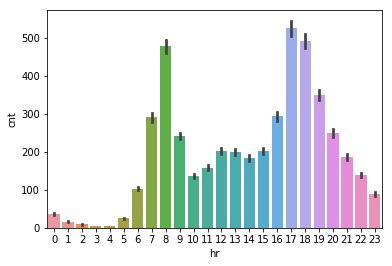

In [133]:
sns.barplot(df[df.workingday==1].hr,df[df.workingday==1].cnt)

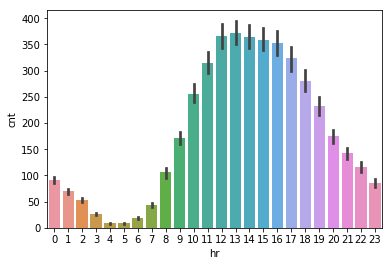

In [134]:
sns.barplot(df[df.workingday==0].hr,df[df.workingday==0].cnt)

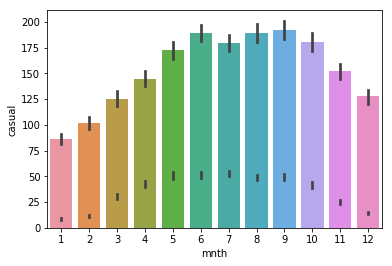

In [135]:
sns.barplot(df.mnth,df.registered)
sns.barplot(df.mnth,df.casual)

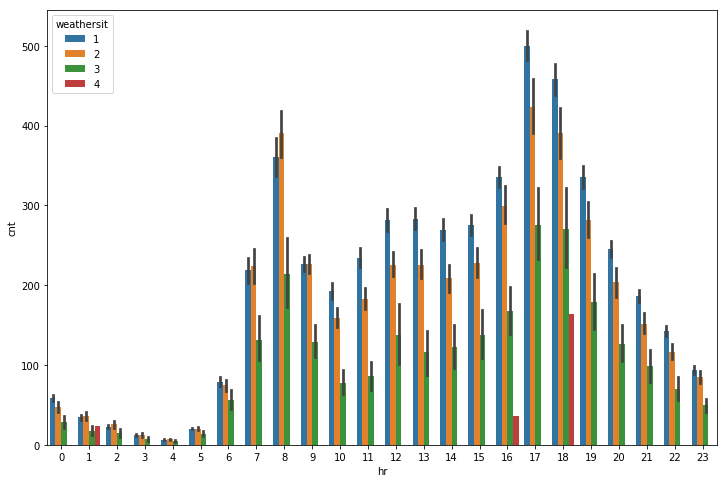

In [138]:
plt.figure(figsize=(12,8))
sns.barplot(x='hr',y='cnt',hue='weathersit',data=df)

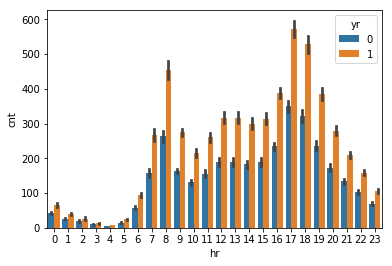

In [139]:
sns.barplot(x='hr',y='cnt',hue='yr',data=df)

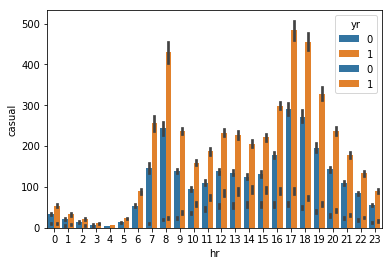

In [145]:
sns.barplot(x='hr',y='registered',hue='yr',data=df)
sns.barplot(x='hr',y='casual',hue='yr',data=df)

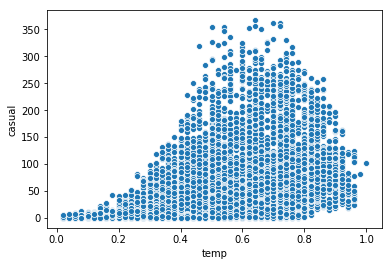

In [146]:
sns.scatterplot(df.temp,df.casual)

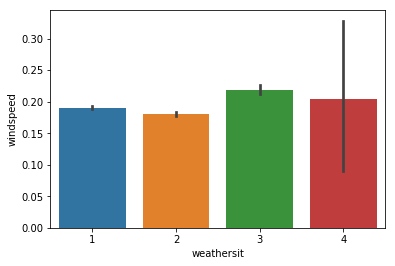

In [147]:
sns.barplot(df.weathersit,df.windspeed)

In [91]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'DateTime', 'Week'],
      dtype='object')

In [141]:
df.groupby('yr')['cnt'].sum()

yr
0    1243103
1    2049576
Name: cnt, dtype: int64

In [142]:
2049576/1243103*100

164.87579870694543

In [143]:
df.groupby('yr')['registered'].sum()

yr
0     995851
1    1676811
Name: registered, dtype: int64

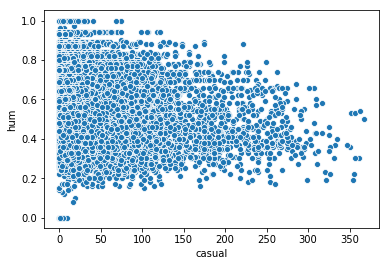

In [149]:
sns.scatterplot(df.casual,df.hum)

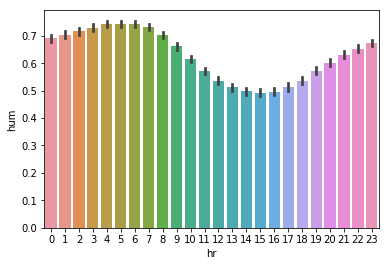

In [150]:
sns.barplot(df.hr,df.hum)

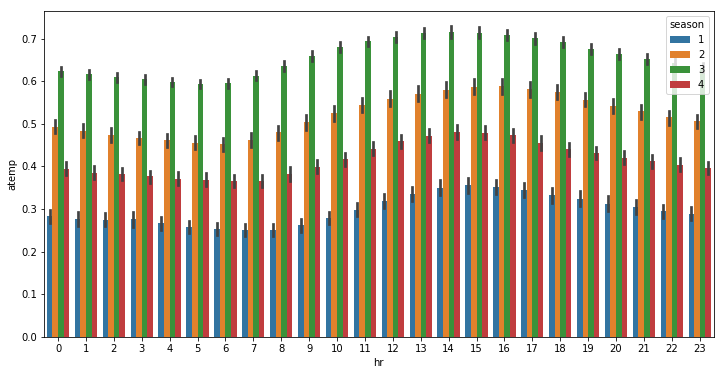

In [153]:
plt.figure(figsize=(12,6))
sns.barplot(x='hr',y='atemp',hue='season',data=df)

In [29]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'DateTime'],
      dtype='object')

In [14]:
df1=df.groupby('mnth')['cnt'].mean()

In [15]:
df1

mnth
1      94.424773
2     112.865026
3     155.410726
4     187.260960
5     222.907258
6     240.515278
7     231.819892
8     238.097627
9     240.773138
10    222.158511
11    177.335421
12    142.303439
Name: cnt, dtype: float64

Text(0.5, 1.0, 'mean cnt vs month ')

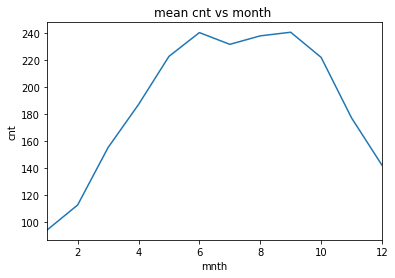

In [23]:
df1.plot()
plt.ylabel('cnt')
plt.title('mean cnt vs month ')

In [62]:
dmap={0:'sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'}

In [79]:
df['Week']=df['weekday'].map(dmap)
df['Week'].head()

0    Saturday
1    Saturday
2    Saturday
3    Saturday
4    Saturday
Name: Week, dtype: object

Text(0, 0.5, 'Temp')

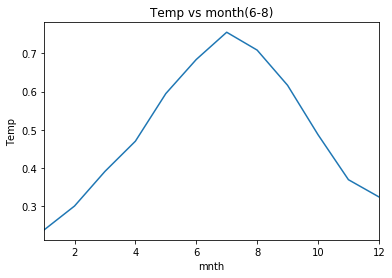

In [22]:
df3=df.groupby(['mnth'])['temp'].mean()
df3.plot()
plt.title('Temp vs month(6-8)')
plt.ylabel('Temp')

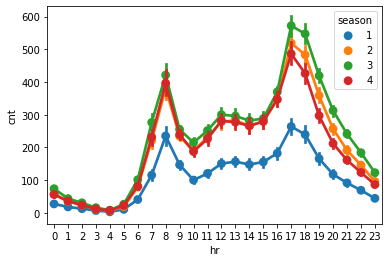

In [83]:
sns.pointplot(df['hr'],df['cnt'],hue=df['season'])

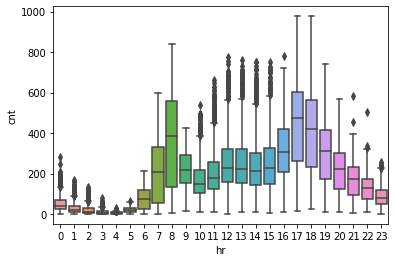

In [87]:
sns.boxplot(data=df,x='hr',y='cnt')

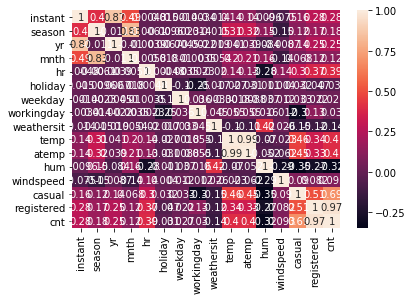

In [98]:
sns.heatmap(df.corr(),annot=True)

In [108]:
df_corr=df[['season','hr','weathersit','temp','casual','registered']].corr()
df_corr

,season,hr,weathersit,temp,casual,registered
season,1.000000,-0.006117,-0.014524,0.312025,0.120206,0.174226
hr,-0.006117,1.000000,-0.020203,0.137603,0.301202,0.374141
weathersit,-0.014524,-0.020203,1.000000,-0.102640,-0.152628,-0.120966
temp,0.312025,0.137603,-0.102640,1.000000,0.459616,0.335361
casual,0.120206,0.301202,-0.152628,0.459616,1.000000,0.506618
registered,0.174226,0.374141,-0.120966,0.335361,0.506618,1.000000


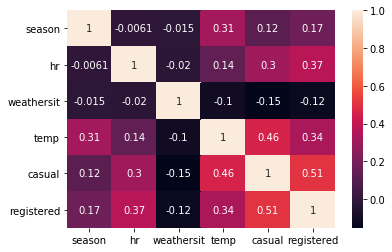

In [105]:
sns.heatmap(df_corr.corr(),annot=True,)

Text(0.5, 1.0, 'count according to seasons for each year')

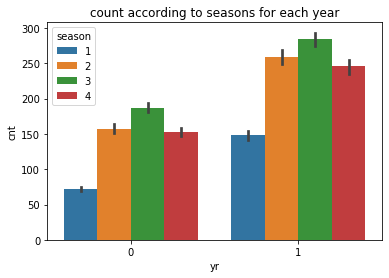

In [24]:
df['yr']=df['yr'].astype(str)
sns.barplot(df['yr'],df['cnt'],hue=df['season'])
plt.title('count according to seasons for each year')

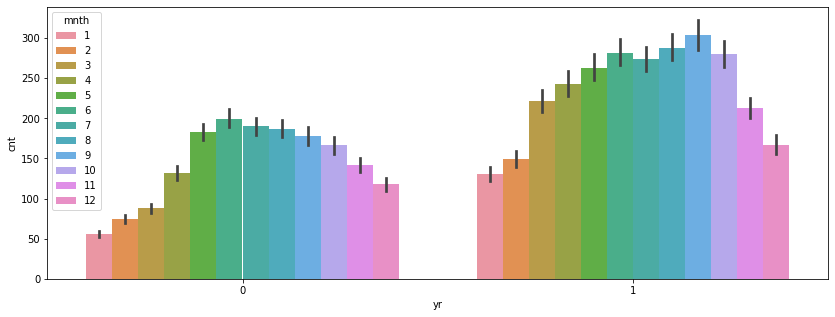

In [39]:
plt.figure(figsize=(14,5))
sns.barplot(df['yr'],df['cnt'],hue=df['mnth'])

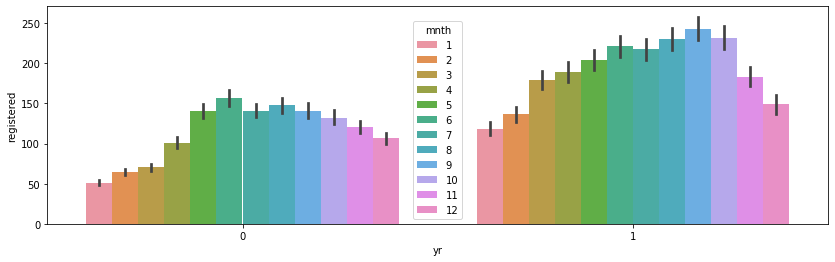

In [41]:
plt.figure(figsize=(14,4))
sns.barplot(df['yr'],df['registered'],hue=df['mnth'])

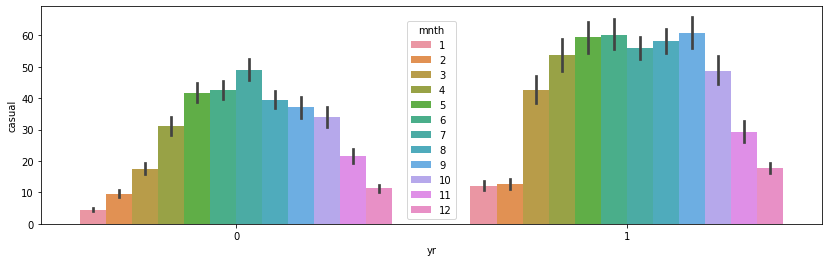

In [43]:
plt.figure(figsize=(14,4))
sns.barplot(df['yr'],df['casual'],hue=df['mnth')

c:\users\chinmay maganur\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


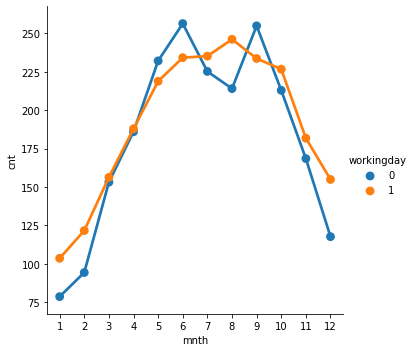

In [25]:
sns.factorplot(x='mnth',y='cnt',data=df,hue='workingday',ci=None)

In [53]:
df_fall=df[df['season']==3]
df_fall.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,DateTime
4010,4011,2011-06-21,3,0,6,0,0,2,1,1,0.62,0.5909,0.78,0.1642,10,23,33,2011-06-21 00:00:00
4011,4012,2011-06-21,3,0,6,1,0,2,1,3,0.62,0.5909,0.78,0.1642,2,12,14,2011-06-21 01:00:00
4012,4013,2011-06-21,3,0,6,2,0,2,1,3,0.62,0.5758,0.83,0.1642,1,5,6,2011-06-21 02:00:00
4013,4014,2011-06-21,3,0,6,3,0,2,1,3,0.62,0.5758,0.83,0.1642,0,2,2,2011-06-21 03:00:00
4014,4015,2011-06-21,3,0,6,4,0,2,1,2,0.60,0.5455,0.88,0.1045,2,7,9,2011-06-21 04:00:00


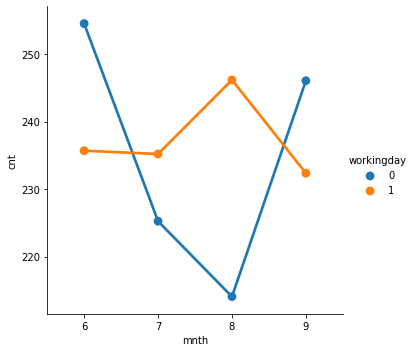

In [59]:
sns.factorplot(x='mnth',y='cnt',data=df_fall,hue='workingday',ci=None)

In [70]:
df_4=df[df['season']==4]

In [71]:
df_4['mnth'].unique()

array([ 9, 10, 11, 12], dtype=int64)

In [74]:
df_1=df[df['season']==1]
df_1['mnth'].unique()

array([ 1,  2,  3, 12], dtype=int64)

In [75]:
df_2=df[df['season']==2]
df_2['mnth'].unique()

array([3, 4, 5, 6], dtype=int64)

In [104]:
df_yr0s2=df[(df['yr']=='0') & (df['season']==2) ]
df_yr0s2

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,DateTime
1807,1808,2011-03-21,2,0,3,0,0,1,1,3,0.34,0.3030,0.66,0.3881,2,11,13,2011-03-21 00:00:00
1808,1809,2011-03-21,2,0,3,1,0,1,1,2,0.34,0.3030,0.71,0.3881,1,6,7,2011-03-21 01:00:00
1809,1810,2011-03-21,2,0,3,2,0,1,1,2,0.34,0.3030,0.71,0.3284,1,5,6,2011-03-21 02:00:00
1810,1811,2011-03-21,2,0,3,3,0,1,1,2,0.34,0.3030,0.71,0.3284,0,1,1,2011-03-21 03:00:00
1811,1812,2011-03-21,2,0,3,5,0,1,1,1,0.32,0.3030,0.81,0.2985,1,1,2,2011-03-21 05:00:00
1812,1813,2011-03-21,2,0,3,6,0,1,1,3,0.32,0.3030,0.76,0.2537,2,30,32,2011-03-21 06:00:00
1813,1814,2011-03-21,2,0,3,7,0,1,1,3,0.30,0.2727,0.87,0.4179,3,15,18,2011-03-21 07:00:00
1814,1815,2011-03-21,2,0,3,8,0,1,1,2,0.30,0.2727,0.87,0.4179,3,95,98,2011-03-21 08:00:00
1815,1816,2011-03-21,2,0,3,9,0,1,1,2,0.34,0.3030,0.81,0.3284,12,115,127,2011-03-21 09:00:00
1816,1817,2011-03-21,2,0,3,10,0,1,1,2,0.38,0.3939,0.76,0.3881,17,45,62,2011-03-21 10:00:00


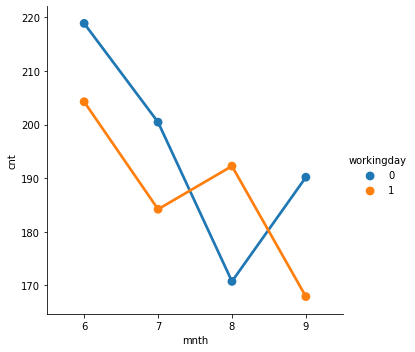

In [94]:
sns.factorplot(x='mnth',y='cnt',data=df_yr0s3,hue='workingday',ci=None)

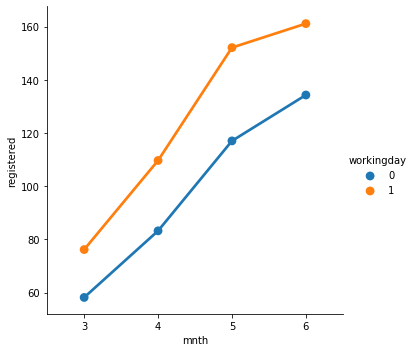

In [110]:
sns.factorplot(x='mnth',y='registered',data=df_yr0s2,hue='workingday',ci=None)

In [111]:
df_yr0s3=df[(df['yr']=='0') & (df['season']==3) ]
df_yr0s3

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,DateTime
4010,4011,2011-06-21,3,0,6,0,0,2,1,1,0.62,0.5909,0.78,0.1642,10,23,33,2011-06-21 00:00:00
4011,4012,2011-06-21,3,0,6,1,0,2,1,3,0.62,0.5909,0.78,0.1642,2,12,14,2011-06-21 01:00:00
4012,4013,2011-06-21,3,0,6,2,0,2,1,3,0.62,0.5758,0.83,0.1642,1,5,6,2011-06-21 02:00:00
4013,4014,2011-06-21,3,0,6,3,0,2,1,3,0.62,0.5758,0.83,0.1642,0,2,2,2011-06-21 03:00:00
4014,4015,2011-06-21,3,0,6,4,0,2,1,2,0.60,0.5455,0.88,0.1045,2,7,9,2011-06-21 04:00:00
4015,4016,2011-06-21,3,0,6,5,0,2,1,2,0.60,0.5455,0.88,0.1343,3,22,25,2011-06-21 05:00:00
4016,4017,2011-06-21,3,0,6,6,0,2,1,2,0.60,0.5455,0.88,0.1343,8,107,115,2011-06-21 06:00:00
4017,4018,2011-06-21,3,0,6,7,0,2,1,2,0.60,0.5152,0.94,0.0000,21,288,309,2011-06-21 07:00:00
4018,4019,2011-06-21,3,0,6,8,0,2,1,2,0.62,0.5606,0.88,0.1045,33,368,401,2011-06-21 08:00:00
4019,4020,2011-06-21,3,0,6,9,0,2,1,2,0.62,0.5606,0.88,0.2537,32,243,275,2011-06-21 09:00:00


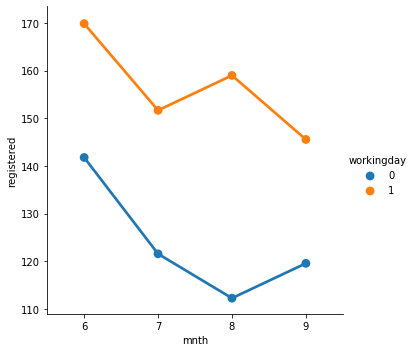

In [113]:
sns.factorplot(x='mnth',y='registered',data=df_yr0s3,hue='workingday',ci=None)

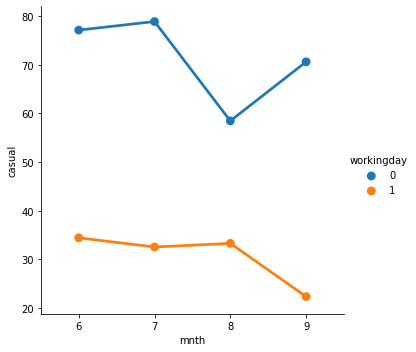

In [115]:
sns.factorplot(x='mnth',y='casual',data=df_yr0s3,hue='workingday',ci=None)

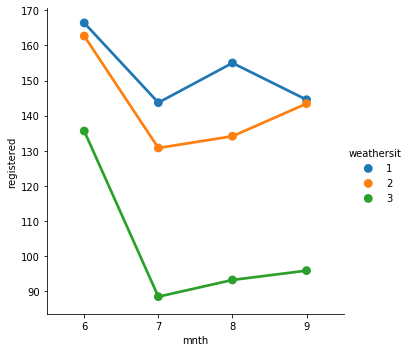

In [117]:
sns.factorplot(x='mnth',y='registered',data=df_yr0s3,hue='weathersit',ci=None)

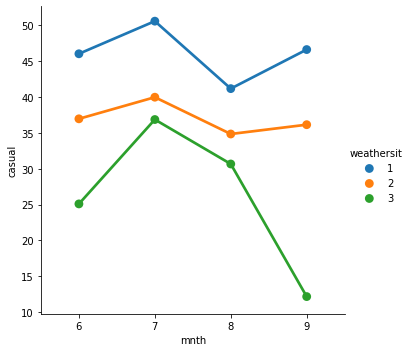

In [118]:
sns.factorplot(x='mnth',y='casual',data=df_yr0s3,hue='weathersit',ci=None)

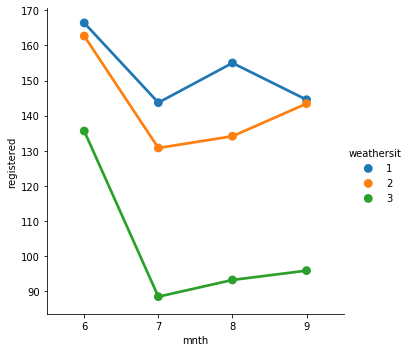

In [126]:
sns.factorplot(x='mnth',y='registered',data=df_yr0s3,hue='weathersit',ci=None)

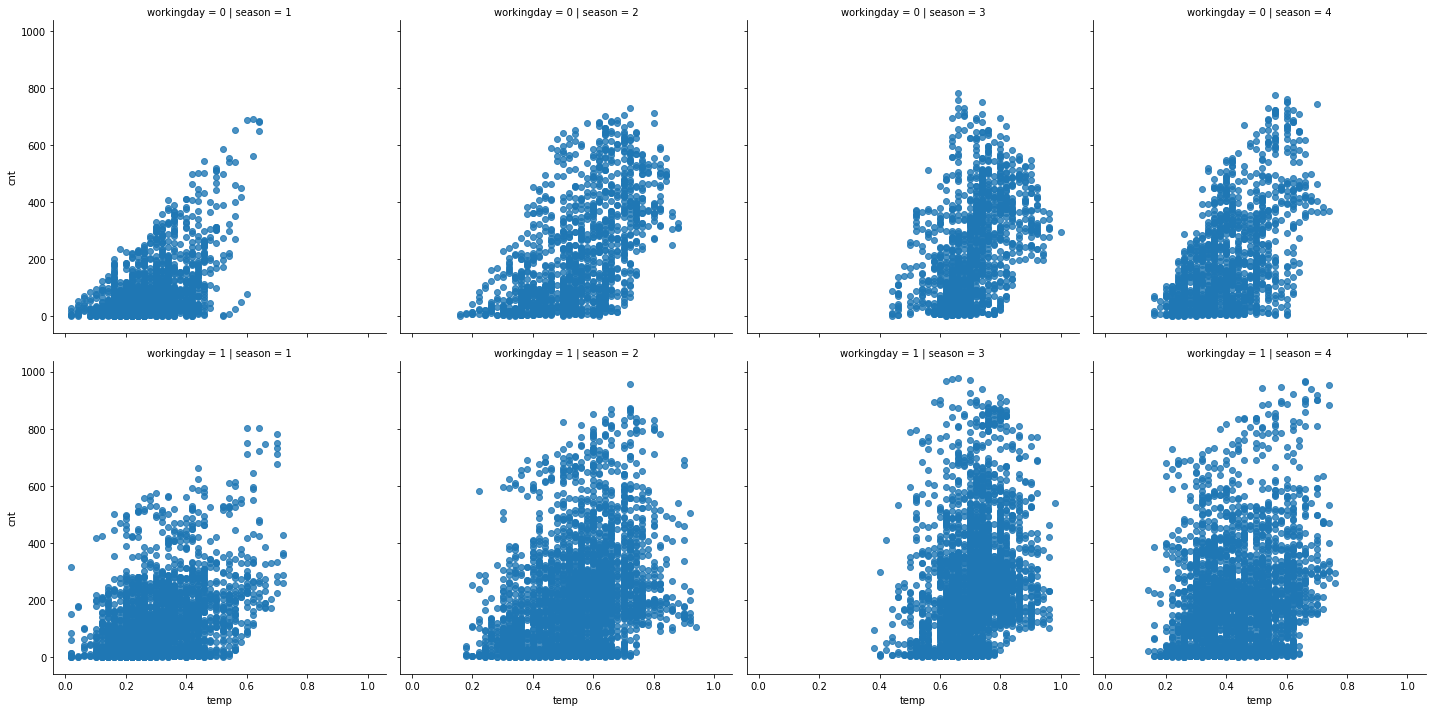

In [130]:
sns.lmplot('temp','cnt',df,fit_reg=False,row='workingday',col='season')

In [132]:
from sklearn.model_selection import train_test_split

In [133]:
df.column

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'DateTime'],
      dtype='object')

In [58]:
df[(df['season']==3) & (df['yr']==0)]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
4010,4011,2011-06-21,3,0,6,0,0,2,1,1,0.62,0.5909,0.78,0.1642,10,23,33
4011,4012,2011-06-21,3,0,6,1,0,2,1,3,0.62,0.5909,0.78,0.1642,2,12,14
4012,4013,2011-06-21,3,0,6,2,0,2,1,3,0.62,0.5758,0.83,0.1642,1,5,6
4013,4014,2011-06-21,3,0,6,3,0,2,1,3,0.62,0.5758,0.83,0.1642,0,2,2
4014,4015,2011-06-21,3,0,6,4,0,2,1,2,0.60,0.5455,0.88,0.1045,2,7,9
4015,4016,2011-06-21,3,0,6,5,0,2,1,2,0.60,0.5455,0.88,0.1343,3,22,25
4016,4017,2011-06-21,3,0,6,6,0,2,1,2,0.60,0.5455,0.88,0.1343,8,107,115
4017,4018,2011-06-21,3,0,6,7,0,2,1,2,0.60,0.5152,0.94,0.0000,21,288,309
4018,4019,2011-06-21,3,0,6,8,0,2,1,2,0.62,0.5606,0.88,0.1045,33,368,401
4019,4020,2011-06-21,3,0,6,9,0,2,1,2,0.62,0.5606,0.88,0.2537,32,243,275


In [59]:
df[['temp','atemp']].corr()

,temp,atemp
temp,1.000000,0.987672
atemp,0.987672,1.000000


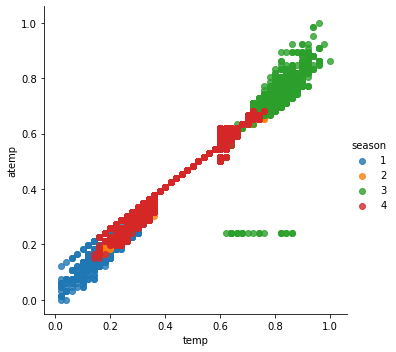

In [63]:
sns.lmplot(x='temp',y='atemp',hue='season',data=df,fit_reg=False)

In [ ]:
#Data Cleaning

In [9]:
X=df[['season','yr','mnth','hr','workingday','temp','weathersit','hum','windspeed']].copy()
y=df['registered']

In [ ]:
#weather is cat,rest we are going with

In [10]:
X['DayNigt']=X.hr.map(lambda  x: 0 if x<7 else 1)

In [12]:
def peakhour(x):
    if x in [7,8,16,17,18,19]:
        return 1
    else:
        return 0

In [13]:
X['Peakhour']=X.hr.map(lambda x:peakhour(x))

In [14]:
#create some dummies
dummy=pd.get_dummies(X['weathersit'],prefix='weathhersit')
#join dummy to df
X=X.join(dummy)
#drop weather sit
X=X.drop(['weathersit'],axis=1)

In [15]:
X.head()

,season,yr,mnth,hr,workingday,temp,hum,windspeed,DayNigt,Peakhour,weathhersit_1,weathhersit_2,weathhersit_3,weathhersit_4
0,1,0,1,0,0,0.24,0.81,0.0,0,0,1,0,0,0
1,1,0,1,1,0,0.22,0.80,0.0,0,0,1,0,0,0
2,1,0,1,2,0,0.22,0.80,0.0,0,0,1,0,0,0
3,1,0,1,3,0,0.24,0.75,0.0,0,0,1,0,0,0
4,1,0,1,4,0,0.24,0.75,0.0,0,0,1,0,0,0


In [16]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [17]:
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
y_hat=lm.predict(X)

In [19]:
from  sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print('R2 value is',r2_score(y,y_hat))
print('MAE',mean_absolute_error(y,y_hat))
print('SMAE',mean_squared_error(y,y_hat)**0.5)

R2 value is 0.6026021202792494
MAE 70.23538539781522
SMAE 95.41213393809066


In [20]:
res=y-y_hat #sum of res tends to 0
sum(res)

3.70249608749873e-10

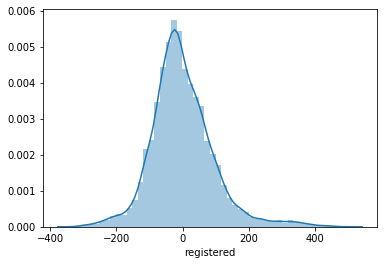

In [21]:
#residuals shoulld be normally distributed
sns.distplot(res)

In [ ]:
#count is posison distriibution,linear is built for continous data
#reason is linear is buit for normal(target variable)

# Log_Normal Modell

In [82]:
log_y=np.log1p(y)

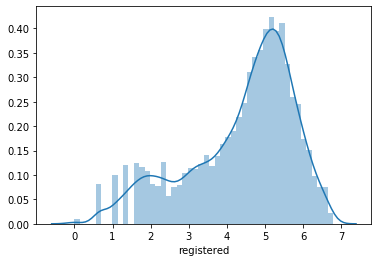

In [83]:
sns.distplot(log_y)

In [84]:
model=LinearRegression()
model.fit(X,log_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [85]:
model.score(X,log_y)

0.7155929457646468

In [86]:
y_hat=model.predict(X)
y_hat=np.exp(y_hat)

In [87]:
print('R2 value is',r2_score(y,y_hat))
print('MAE',mean_absolute_error(y,y_hat))
print('SMAE',mean_squared_error(y,y_hat)**0.5)

R2 value is 0.6415453949857339
MAE 59.47365987585726
SMAE 90.61663239767749


In [88]:
res=y-y_hat #sum of res tends to 0
sum(res)

325732.41048231605

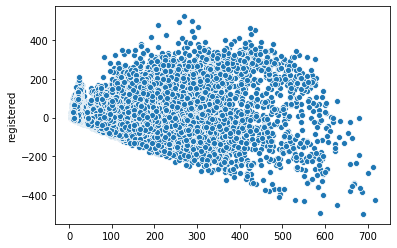

In [92]:
sns.scatterplot(y_hat,res)


# NON Linear Model

In [95]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=4,include_bias=False)
X_poly=poly.fit_transform(X)

In [97]:
model=LinearRegression(n_jobs=-1)
model.fit(X_poly,log_y)
model.score(X_poly,log_y)

0.946321450527665

In [98]:
y_hat=np.exp(model.predict(X_poly))

In [99]:
r2_score(y,y_hat)

0.9287978363885231

In [37]:
dum=dict(a=[1,2,3,4],b=[2,4,9,16])
dum1=dict(a=[1,2,3,4],b=[1,8,27,64])



In [39]:
dum=pd.DataFrame(dum)

In [44]:
dum['b_log']=np.log1p(dum['b'])
dum['b_log']

0    0.693147
1    2.197225
2    3.332205
3    4.174387
Name: b_log, dtype: float64

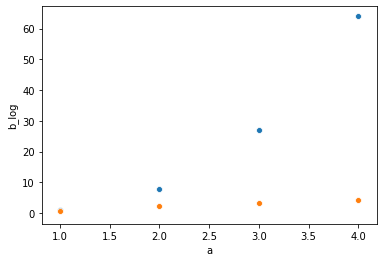

In [45]:
sns.scatterplot(dum['a'],dum['b'])
sns.scatterplot(dum['a'],dum['b_log'])